# 2D ladder, some theory and practice


In [152]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.linalg import eig
%matplotlib inline

E = 0.
n_modes = 5
for E in np.linspace(0., 10., 32):
    H = np.matrix(np.eye(n_modes) * 2.)
    V = np.matrix(np.eye(n_modes) * -1.)
    zs = np.zeros((n_modes, n_modes))
    os = np.eye(n_modes)
    top = np.hstack((zs, os))
    bottom = np.hstack((-V, os* E - H))
    p1 = np.vstack((top, bottom))
    p2 = np.vstack((np.hstack((os, zs)), np.hstack((zs, V.H))))
    eigs, vecs = eig(p1, p2)
    counts = {'imag-': 0, 'imag+': 0, 'real-': 0, 'real+': 0}
    for k in np.log(eigs):
        if np.imag(k) == 0.:
            if np.real(k) > 0.:
                counts['real+'] += 1
            elif np.real(k) < 0.:
                counts['real-'] += 1
        else:
            if np.imag(k) > 0.:
                counts['imag+'] += 1
            elif np.imag(k) < 0.:
                counts['imag-'] += 1

    print(E, counts)
#     wfs = []
#     for i in range(n_modes):
#         wfs.append(vecs[:n_modes, i])
#     a = []
#     for wf1 in wfs:
#         b = []
#         for wf2 in wfs: 
#             b.append(np.vdot(wf1, wf2))
#         a.append(b)

    # print(np.real(np.array(a)))
#     plt.imshow(np.real(np.array(a)))
#     plt.colorbar()

0.0 {'imag-': 0, 'imag+': 0, 'real-': 0, 'real+': 5}
0.3225806451612903 {'imag-': 5, 'imag+': 5, 'real-': 0, 'real+': 0}
0.6451612903225806 {'imag-': 5, 'imag+': 5, 'real-': 0, 'real+': 0}
0.967741935483871 {'imag-': 5, 'imag+': 5, 'real-': 0, 'real+': 0}
1.2903225806451613 {'imag-': 5, 'imag+': 5, 'real-': 0, 'real+': 0}
1.6129032258064515 {'imag-': 5, 'imag+': 5, 'real-': 0, 'real+': 0}
1.935483870967742 {'imag-': 5, 'imag+': 5, 'real-': 0, 'real+': 0}
2.258064516129032 {'imag-': 5, 'imag+': 5, 'real-': 0, 'real+': 0}
2.5806451612903225 {'imag-': 5, 'imag+': 5, 'real-': 0, 'real+': 0}
2.903225806451613 {'imag-': 5, 'imag+': 5, 'real-': 0, 'real+': 0}
3.225806451612903 {'imag-': 5, 'imag+': 5, 'real-': 0, 'real+': 0}
3.5483870967741935 {'imag-': 5, 'imag+': 5, 'real-': 0, 'real+': 0}
3.870967741935484 {'imag-': 5, 'imag+': 5, 'real-': 0, 'real+': 0}
4.193548387096774 {'imag-': 0, 'imag+': 10, 'real-': 0, 'real+': 0}
4.516129032258064 {'imag-': 0, 'imag+': 10, 'real-': 0, 'real+': 0}
4

In [138]:
import kwant 
# For plotting
from matplotlib import pyplot
import numpy as np
%matplotlib inline

In [142]:
def make_system(a=1, t=1.0, W=5, L=5):
    # Start with an empty tight-binding system and a single square lattice. 
    # `a` is the lattice constant (by default set to 1 for simplicity.
    lat = kwant.lattice.square(a)

    syst = kwant.Builder()

    syst[(lat(x, y) for x in range(L) for y in range(W))] = 4 * t

    syst[lat.neighbors()] = -t

    lead = kwant.Builder(kwant.TranslationalSymmetry((-a, 0)))
    lead[(lat(0, j) for j in range(W))] = 4 * t
    lead[lat.neighbors()] = -t
    syst.attach_lead(lead)
    syst.attach_lead(lead.reversed())
    return syst

In [153]:
def plot_conductance(syst, energies): # Compute conductance
    data = []
    for energy in energies:
        smatrix = kwant.smatrix(syst, energy)
        data.append(smatrix.transmission(0, 1))
    pyplot.figure()
    pyplot.plot(energies, data)
    pyplot.xlabel("energy [t]")
    pyplot.ylabel("conductance [$2e^2/h$]")
    pyplot.show()
    return np.array(data)

/Users/b295319/anaconda3/lib/python3.6/site-packages/kwant/linalg/lll.py:103: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.
  coefs = np.linalg.lstsq(vecs_orig.T, vecs.T)[0]
/Users/b295319/anaconda3/lib/python3.6/site-packages/kwant/linalg/lll.py:144: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.
  center_coords = np.array(np.round(np.linalg.lstsq(basis.T, vec)[0]), int)


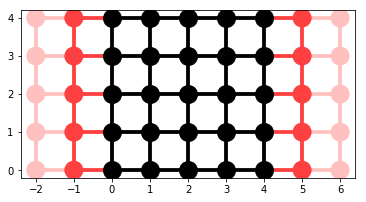

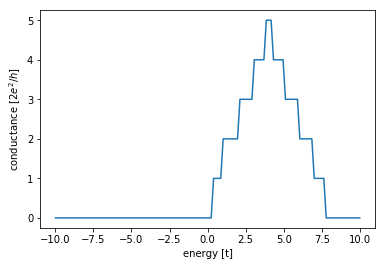

In [154]:
syst = make_system()
# Check that the system looks as intended.
kwant.plot(syst)
# Finalize the system.
syst = syst.finalized()
# We should see conductance steps.
e = np.linspace(-10,10,128)
cond = plot_conductance(syst, energies=np.linspace(-10,10,128))